# 선형회귀 모델 (sklearn)

In [112]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mlxtend.preprocessing import minmax_scaling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 1. 데이터 불러오기

In [113]:
df = pd.read_csv('C:/Users/Admin/Desktop/OSSP_final_data_filled_with_knn_with_LABEL.csv', encoding = 'cp949')

In [114]:
df.head()

,Unnamed: 0,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,상권코드_6,...,상권코드_1495,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,0,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,90544.0,14.48,82.273333,2.942853e+08,24.0,52.0,1.671959e+11,15904.0,2.587177
1,1,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3026454.0,22.00,89.000000,5.273471e+08,8221.0,242.0,1.546181e+11,24375.0,3.026257
2,2,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4033679.0,5.00,39.000000,1.120979e+08,1924.0,327.0,2.592398e+11,32935.0,2.081362
3,3,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3262023.0,8.00,53.000000,2.379674e+08,2427.0,165.0,2.466393e+11,6054.0,2.107308
4,4,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3764785.0,14.48,82.273333,2.942853e+08,1104.0,593.0,3.766214e+11,104830.0,2.163080


In [115]:
df.shape

(32912, 1508)

In [116]:
df.columns

Index(['Unnamed: 0', '기준_년_코드', '기준_분기_코드', '상권코드_0', '상권코드_1', '상권코드_2',
       '상권코드_3', '상권코드_4', '상권코드_5', '상권코드_6',
       ...
       '상권코드_1495', '총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
       '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률'],
      dtype='object', length=1508)

In [117]:
n_of_nulls = df.isnull().sum().sum()
print("결측치 수 : ", n_of_nulls)

결측치 수 :  0


## 2. 데이터 전처리
### (1) 데이터 정규화

In [118]:
# 사용할 column 추출
columns = ['총_유동인구_수', '아파트_단지_수', '아파트_평균_면적', '아파트_평균_시가',
       '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수', '폐업률']

df_lm = df[columns]

In [119]:
df_lm.head()

,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,90544.0,14.48,82.273333,2.942853e+08,24.0,52.0,1.671959e+11,15904.0,2.587177
1,3026454.0,22.00,89.000000,5.273471e+08,8221.0,242.0,1.546181e+11,24375.0,3.026257
2,4033679.0,5.00,39.000000,1.120979e+08,1924.0,327.0,2.592398e+11,32935.0,2.081362
3,3262023.0,8.00,53.000000,2.379674e+08,2427.0,165.0,2.466393e+11,6054.0,2.107308
4,3764785.0,14.48,82.273333,2.942853e+08,1104.0,593.0,3.766214e+11,104830.0,2.163080


In [120]:
# min-max scaling 진행
df_lm_n = df_lm.copy()
for col in df_lm_n.columns:
    df_lm_n[col] = minmax_scaling(df_lm[col], columns=[0])

In [121]:
df_lm_n.head()

,총_유동인구_수,아파트_단지_수,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률
0,0.009227,0.028620,0.286667,0.123935,0.001466,0.086149,0.257041,0.090966,0.045276
1,0.308615,0.044586,0.310105,0.222086,0.502015,0.407095,0.237704,0.139421,0.052960
2,0.411326,0.008493,0.135889,0.047209,0.117489,0.550676,0.398546,0.188385,0.036424
3,0.332637,0.014862,0.184669,0.100217,0.148205,0.277027,0.379175,0.034624,0.036878
4,0.383906,0.028620,0.286667,0.123935,0.067416,1.000000,0.579005,0.599629,0.037854


### (2) 데이터 분할

In [122]:
# 독립변수, 종속변수 설정
X = df_lm_n.drop('폐업률', axis = 1)
y = df_lm_n['폐업률']

In [123]:
# 학습 데이터, 검증 데이터 분할 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

## 3. 모델링

In [124]:
# 모델 생성
model1 = LinearRegression()

In [125]:
# 모델 학습
model1 = model1.fit(X_train, y_train)

In [126]:
# 회귀 계수
model1.coef_

array([-0.02050484, -0.01932853,  0.01460154, -0.07235207,  0.02850647,
        0.04133518, -0.01975831, -0.02381215])

In [127]:
# 회귀 절편
model1.intercept_

0.06473942497011088

## 4. 모델 성능 확인

In [128]:
# 검증 데이터 예측
y_predict = model1.predict(X_test)

In [129]:
# 실제값 : 예측값 비교
y_compare = {'y_test' : y_test, 'y_predict' : y_predict}
pd.DataFrame(y_compare)

,y_test,y_predict
27091,0.086879,0.066173
128,0.000000,0.064190
17511,0.027926,0.069875
14891,0.000000,0.065050
20777,0.021605,0.067578
...,...,...
11147,0.019663,0.060243
6157,0.099756,0.063962
10685,0.028846,0.060576
14913,0.039238,0.065679


Text(0.5, 1.0, 'y_predict & y_test')

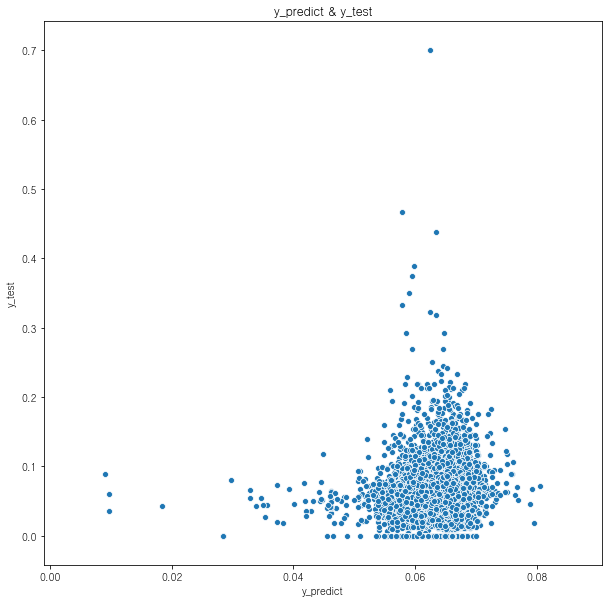

In [162]:
# 실제값 : 예측값 비교

plt.figure(figsize = (10,10))
sns.scatterplot(x = 'y_predict', y = 'y_test', data = y_compare)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.title('y_predict & y_test')

In [131]:
# 훈련 데이터 결정계수(R-Squared)

model1.score(X_train, y_train)

0.010909940975706633

In [132]:
# 검증 데이터 결정계수(R-Squared)

model1.score(X_test, y_test)

0.01035063496668609

In [133]:
# 훈련 데이터 RMSE
y_pred = model1.predict(X_train)
math.sqrt(mean_squared_error(y_train, y_pred))

0.03956183209327263

In [134]:
# 검증 데이터 RMSE
y_pred = model1.predict(X_test)
math.sqrt(mean_squared_error(y_test, y_pred))

0.038669618255378145

- 결정계수는 0.01 수준으로 상당히 낮음    
- 모델의 예측력이 상당히 낮음  
- 추가 조치가 필요함 --> 다중공선성?

## 5. 다중공선성 제거

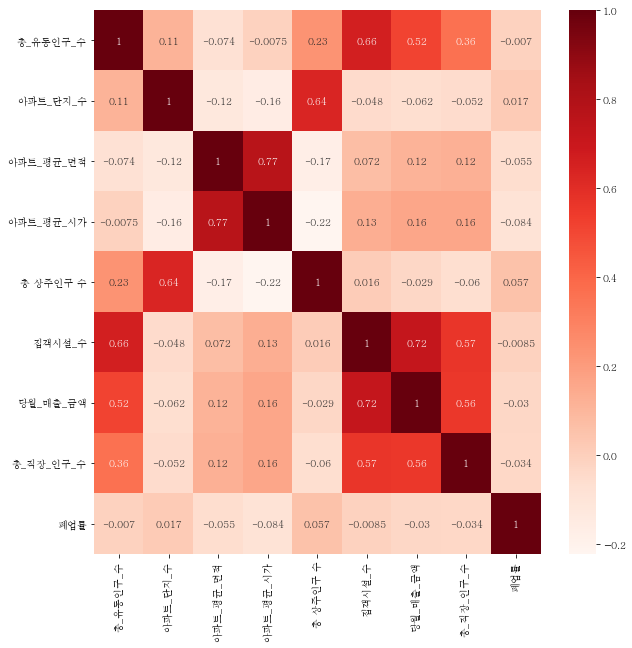

In [163]:
# 변수간 상관관계 히트맵

plt.rc('font', family='Batang')
plt.figure(figsize = (10,10))
sns.heatmap(df_lm_n.corr(), annot = True, cmap = 'Reds')

- 변수간 상관관계가 높은 경우 존재  
- 상관관계가 높은 변수들을 제거하여 모델의 성능을 높임

In [136]:
# VIF(분산 팽창 요인) 계산

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_lm_n.values, i) for i in range(df_lm_n.shape[1])]
vif["features"] = df_lm_n.columns

In [137]:
vif

,VIF Factor,features
0,3.072699,총_유동인구_수
1,2.952308,아파트_단지_수
2,13.255360,아파트_평균_면적
3,7.977302,아파트_평균_시가
4,4.971384,총 상주인구 수
5,3.961367,집객시설_수
6,2.638335,당월_매출_금액
7,1.717876,총_직장_인구_수
8,3.148338,폐업률


- VIF Factor가 10 이상 >> 위험
- VIF Factor가 5 이상 >> 주의
- '아파트 평균 면적' column 제거 후 다시 계산

In [138]:
data = df_lm_n.drop(['아파트_평균_면적'], axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns

In [139]:
vif

,VIF Factor,features
0,3.072037,총_유동인구_수
1,2.951636,아파트_단지_수
2,2.191704,아파트_평균_시가
3,4.531454,총 상주인구 수
4,3.959651,집객시설_수
5,2.637966,당월_매출_금액
6,1.717874,총_직장_인구_수
7,2.548291,폐업률


## 6. model2

- 다중공선성을 일으켰던 '아파트 평균 면적' column 제거

In [149]:
df_lm_n_2 = df_lm_n.drop('아파트_평균_면적', axis = 1)

# 데이터 분할
X = df_lm_n_2.drop('폐업률', axis = 1)
y = df_lm_n_2['폐업률']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.2, random_state = 20)

# 모델 학습
model2 = LinearRegression()
model2 = model2.fit(X_train_2, y_train_2)

In [150]:
# 회귀 계수

model2.coef_

array([-0.02244427, -0.01945775, -0.05829047,  0.02880265,  0.04128188,
       -0.01905743, -0.02339943])

In [151]:
# 회귀식 절편

model2.intercept_

0.0666403856000959

## 7. model2 성능 확인

In [152]:
# 검증 데이터 예측

y_predict = model2.predict(X_test_2)

In [153]:
# 실제값 : 예측값 비교
y_compare = {'y_test' : y_test_2, 'y_predict' : y_predict}
pd.DataFrame(y_compare)

,y_test,y_predict
27091,0.086879,0.066614
128,0.000000,0.063933
17511,0.027926,0.069399
14891,0.000000,0.065572
20777,0.021605,0.068064
...,...,...
11147,0.019663,0.061111
6157,0.099756,0.063947
10685,0.028846,0.060889
14913,0.039238,0.066673


Text(0.5, 1.0, 'y_predict & y_test')

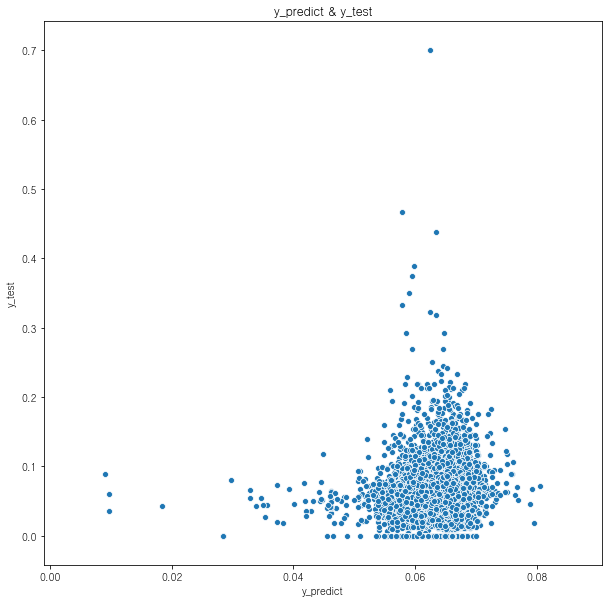

In [161]:
# 실제값 : 예측값 비교

plt.figure(figsize = (10,10))
sns.scatterplot(x = 'y_predict', y = 'y_test', data = y_compare)
plt.xlabel('y_predict')
plt.ylabel('y_test')
plt.title('y_predict & y_test')

In [155]:
# 훈련 데이터 결정계수(R-Squared)

model2.score(X_train_2, y_train_2)

0.010689444920242708

In [157]:
# 검증 데이터 결정계수(R-Squared)

model2.score(X_test_2, y_test_2)

0.010522344059500699

In [158]:
# 훈련 데이터 RMSE

y_pred = model2.predict(X_train_2)
math.sqrt(mean_squared_error(y_train_2, y_pred))

0.03956624157132507

In [159]:
# 검증 데이터 RMSE

y_pred = model2.predict(X_test_2)
math.sqrt(mean_squared_error(y_test_2, y_pred))

0.038666263424190085

- 여전히 모델의 결정 계수가 낮음
- 여전히 모델의 예측력이 낮음  
- 회귀모델의 유의성 및 회귀계수의 유의성 확인이 필요  
- 변수선택을 정교하게 할 필요가 존재  
- statsmodel을 이용한 선형회귀 분석